<div align="center">

<img src="https://miro.medium.com/v2/resize:fit:1200/1*OP9kEoxISU4fkZGxKkAM0A.jpeg" alt="Online Advertising Click Prediction" width="600">

</div>


# 🧾 **Advertising Dataset — Column Description**

| **Column Name** | **Description** |
|-----------------|-----------------|
| **Daily Time Spent on Site** | The average number of minutes a user spends on the website each day. Indicates engagement level. |
| **Age** | The age of the user. |
| **Area Income** | The average income of the area where the user lives (usually in USD). |
| **Daily Internet Usage** | The average number of minutes a user spends on the Internet per day (not just on the site). |
| **Ad Topic Line** | The headline or main text of the advertisement shown to the user. |
| **City** | The city where the user resides. |
| **Male** | A binary variable indicating gender:<br>`1` → Male<br>`0` → Female |
| **Country** | The country where the user lives. |
| **Timestamp** | The date and time when the ad was shown or clicked. |
| **Clicked on Ad** | The **target variable**:<br>`1` → The user clicked on the ad<br>`0` → The user did not click on the ad. |

---
#### 🎯 ***Purpose of the Dataset***
This dataset is commonly used to build a **classification model** that predicts whether a user **will click on an ad** based on their demographics, browsing behavior, and online activity patterns.


##🧾 **Profiling the Dataset**

In [2]:
# @title
#!pip install ydata_profiling

In [3]:
# @title
from ydata_profiling import ProfileReport
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/content/advertising.csv')
profile=ProfileReport(df,title='Profiling Report')
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 15.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile

##🧭 **Data Overview**

In [5]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [6]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [8]:
df.shape

(1000, 10)

In [9]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [10]:
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   
std                   15.853615     8.785562  13414.634022   

       Daily Internet Usage         Male                      Timestamp  \
count           1000.000000  1000.000000                           1000   
mean             180.000100     0.481000  2016-04-10 10:34:06.636000256   
min              104.780000     0.000000            2016-01-01 02:52:10   
25%              138.830000     0.000000            2016-02-18 02:55:42   
50%              183.130000     0.000000     2016-04-07 17:27:29.500000   
75%              218.792500     1.000000            2016-05-31 03:18:14   
max              269.960000     1.000000            2016-07-24 00:22:16   
std               43.902339     0.499889                            NaN   

       Clicked on Ad  
count     1000.00000  
mean         0.50000  
min          0.00000  
25%          0.00000  
50%          0.50000  
75%          1.00000  
max          1.00000  
std          0.50025

In [11]:
df.describe(include='O')

Ad Topic Line       City         Country
count                              1000       1000            1000
unique                             1000        969             237
top     Virtual 5thgeneration emulation  Lisamouth  Czech Republic
freq                                  1          3               9

## ✂️💻 **Train-Test Split**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1️⃣ ترتيب البيانات حسب Timestamp
df_sorted = df.sort_values('Timestamp').reset_index(drop=True)

# 2️⃣ تحديد النسبة لكل class في كل فترة زمنية
train_list = []
test_list = []

for cls in df_sorted['Clicked on Ad'].unique():
    df_cls = df_sorted[df_sorted['Clicked on Ad'] == cls]

    # تقسيم 80% قديم للـ train، 20% حديث للاختبار
    train_size = int(0.8 * len(df_cls))
    train_list.append(df_cls.iloc[:train_size])
    test_list.append(df_cls.iloc[train_size:])

# 3️⃣ دمج كل الفئات
train_set = pd.concat(train_list).sort_values('Timestamp').reset_index(drop=True)
test_set = pd.concat(test_list).sort_values('Timestamp').reset_index(drop=True)

print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Train set shape: (800, 10)
Test set shape: (200, 10)


In [13]:
train_set['Timestamp'].min(), train_set['Timestamp'].max()

(Timestamp('2016-01-01 02:52:10'), Timestamp('2016-06-12 15:25:44'))

In [14]:
test_set['Timestamp'].min(), test_set['Timestamp'].max()

(Timestamp('2016-06-10 03:56:41'), Timestamp('2016-07-24 00:22:16'))

In [15]:
train_set['Clicked on Ad'].value_counts(normalize=True)
test_set['Clicked on Ad'].value_counts(normalize=True)

Clicked on Ad
0    0.5
1    0.5
Name: proportion, dtype: float64

### 🧪📊 **Univariate Analysis (Train Set)**

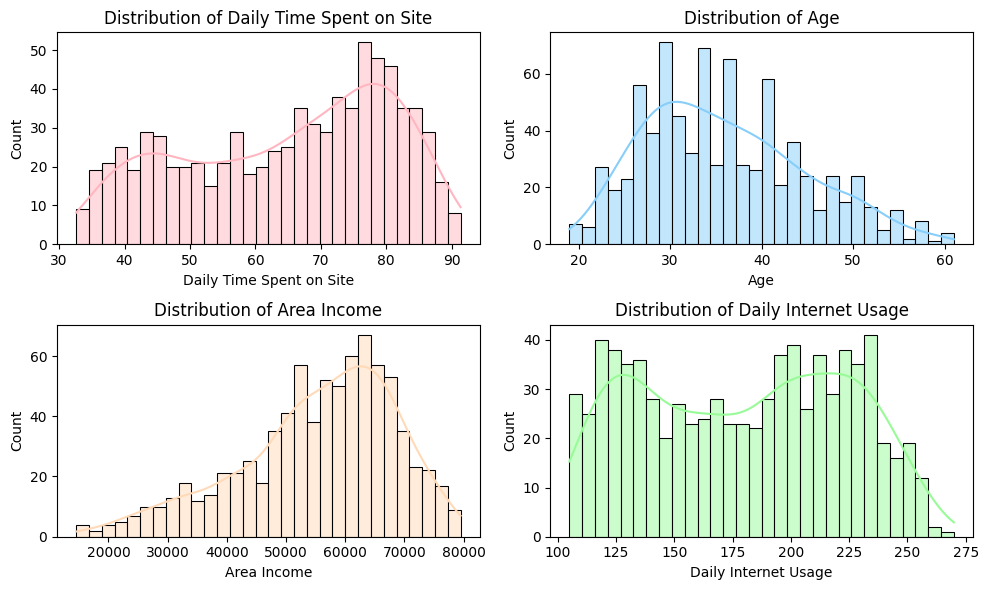

In [16]:
# @title
# ✅ Complete Univariate EDA on Train Set (Time-based)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# --- Univariate EDA on Train Set
# -------------------------------

df_train = train_set.copy()

# --- Numeric Columns ---
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Cute pastel colors
colors = ['#FFB6C1', '#87CEFA', '#FFDAB9', '#98FB98']

plt.figure(figsize=(10,6))
for i, (col, color) in enumerate(zip(numeric_cols, colors), 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[col], kde=True, bins=30, color=color)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [17]:
# @title
import plotly.graph_objects as go

# Resample weekly and count records
weekly_counts = df_train.resample('W', on='Timestamp').size()

# Create interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=weekly_counts.index,
    y=weekly_counts.values,
    mode='lines+markers',
    name='Weekly Records',
    line=dict(color='blue'),
    marker=dict(size=8)
))

# Add titles, axis labels, and figure size
fig.update_layout(
    title='📅 Weekly Number of Records (Train Set)',
    xaxis_title='Week',
    yaxis_title='Number of Records',
    xaxis=dict(tickangle=45),
    template='plotly_white',
    width=1000,   # width in pixels
    height=500    # height in pixels
)

fig.show()

In [18]:
# @title
import plotly.express as px

# Aggregate clicks by country
country_counts = df_train.groupby('Country')['Clicked on Ad'].sum().reset_index()

# Plotly choropleth map
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Clicked on Ad',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Total Ad Clicks by Country'
)

fig.show()

## **🔬📈 Bivariate Analysis (Train Set)**

In [19]:
train_set.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

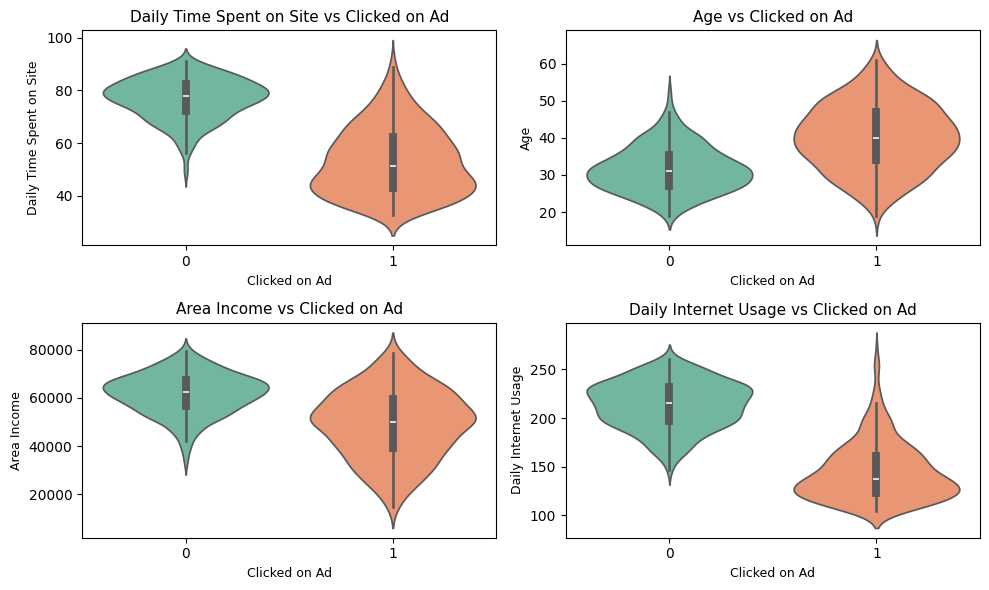

In [20]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
n_cols = 2
n_rows = (len(numerical_cols) + 1) // n_cols

plt.figure(figsize=(10, 3 * n_rows))  # compact figure

# Choose a darker professional palette
palette = sns.color_palette("Set2", 2)  # 2 colors for Clicked vs Not Clicked

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        data=train_set,
        x='Clicked on Ad',
        y=col,
        palette=palette,
        inner='box'
    )
    plt.title(f'{col} vs Clicked on Ad', fontsize=11, pad=6)
    plt.xlabel('Clicked on Ad', fontsize=9)
    plt.ylabel(col, fontsize=9)

plt.tight_layout()
plt.show()

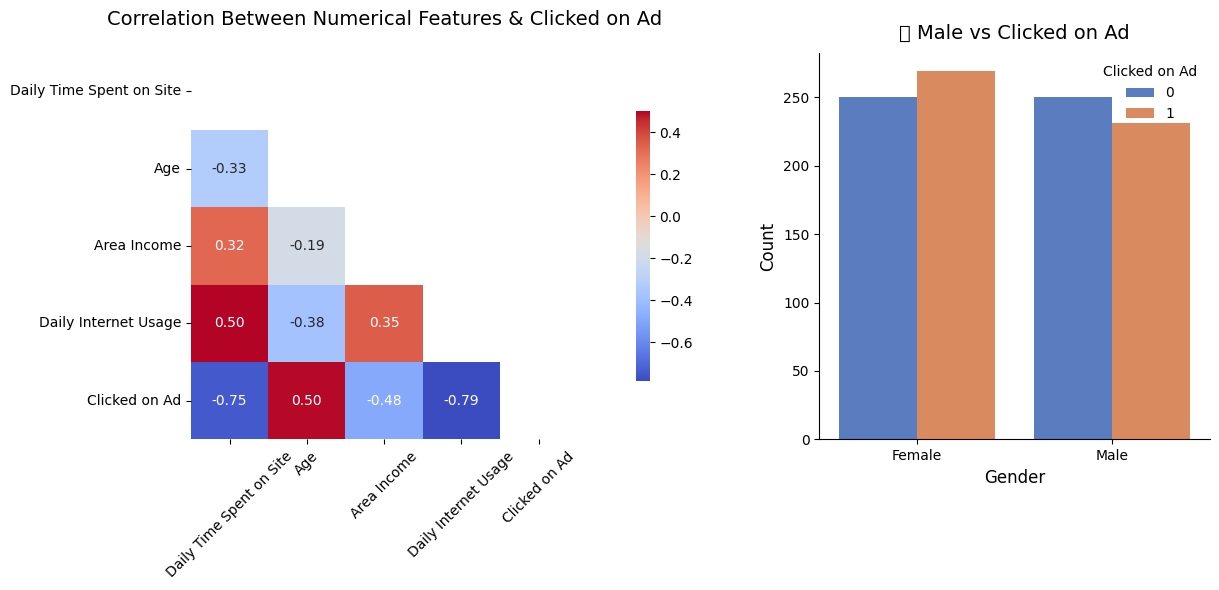

In [21]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Numerical columns + correlation ---
numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']
corr = train_set[numerical_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# --- Create subplots: heatmap bigger than bar plot ---
fig, axes = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [3, 1]})

# ----- Left: Triangular Correlation Heatmap -----
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={"shrink": 0.7},
    linewidths=0,
    square=True,
    ax=axes[0]
)
axes[0].set_title('Correlation Between Numerical Features & Clicked on Ad', fontsize=14, pad=20)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)
sns.despine(ax=axes[0], left=True, bottom=True)

# ----- Right: Male vs Clicked on Ad -----
palette = sns.color_palette("muted", 2)
sns.countplot(data=df, x='Male', hue='Clicked on Ad', palette=palette, ax=axes[1])
axes[1].set_title('🧑 Male vs Clicked on Ad', fontsize=14, pad=10)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticklabels(['Female','Male'])
sns.despine(ax=axes[1])
axes[1].legend(title='Clicked on Ad', frameon=False)

plt.tight_layout()
plt.show()

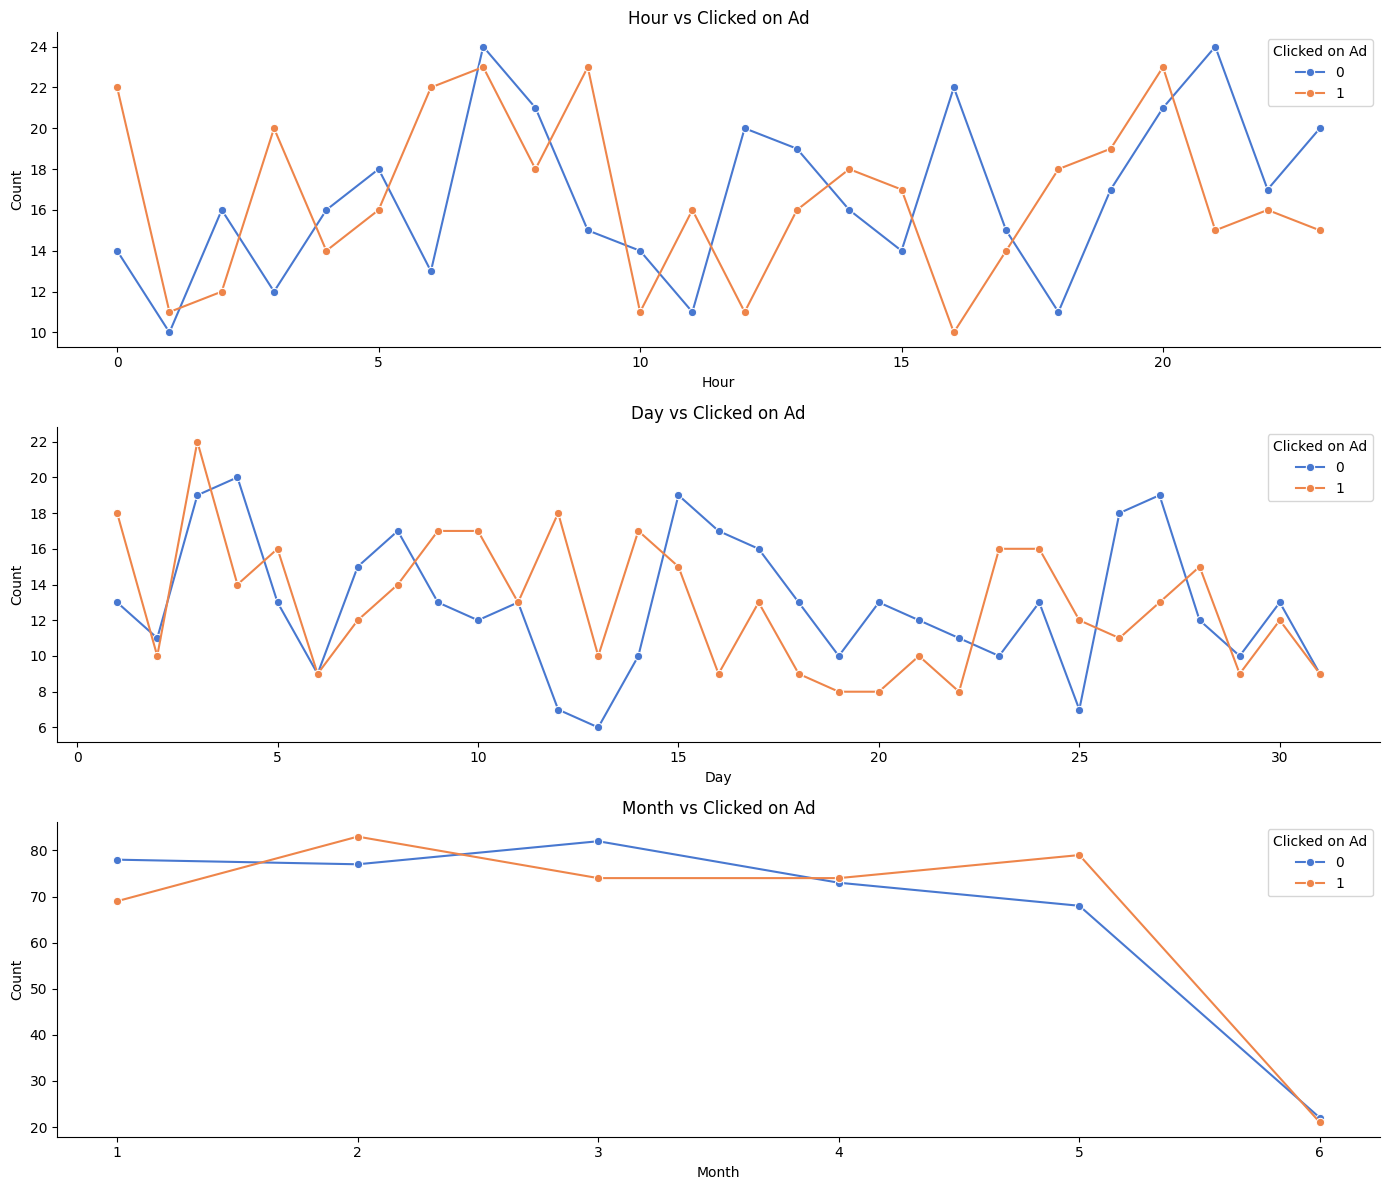

In [22]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Columns for visualization
temporal_cols = ['Hour', 'Day', 'Month']

plt.figure(figsize=(14, 4 * len(temporal_cols)))

for i, col in enumerate(temporal_cols):
    plt.subplot(len(temporal_cols), 1, i + 1)

    # Create temporary column from Timestamp for plotting only
    temp_col = train_set['Timestamp'].dt.__getattribute__(col.lower())  # Hour, Day, Month
    df_plot = train_set.copy()
    df_plot[col] = temp_col

    df_grouped = df_plot.groupby([col, 'Clicked on Ad']).size().reset_index(name='Count')

    sns.lineplot(data=df_grouped, x=col, y='Count', hue='Clicked on Ad', palette='muted', marker='o')
    plt.title(f'{col} vs Clicked on Ad', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    sns.despine()

plt.tight_layout()
plt.show()


##🧩📊 **Multivariate Analysis (Train Set)**

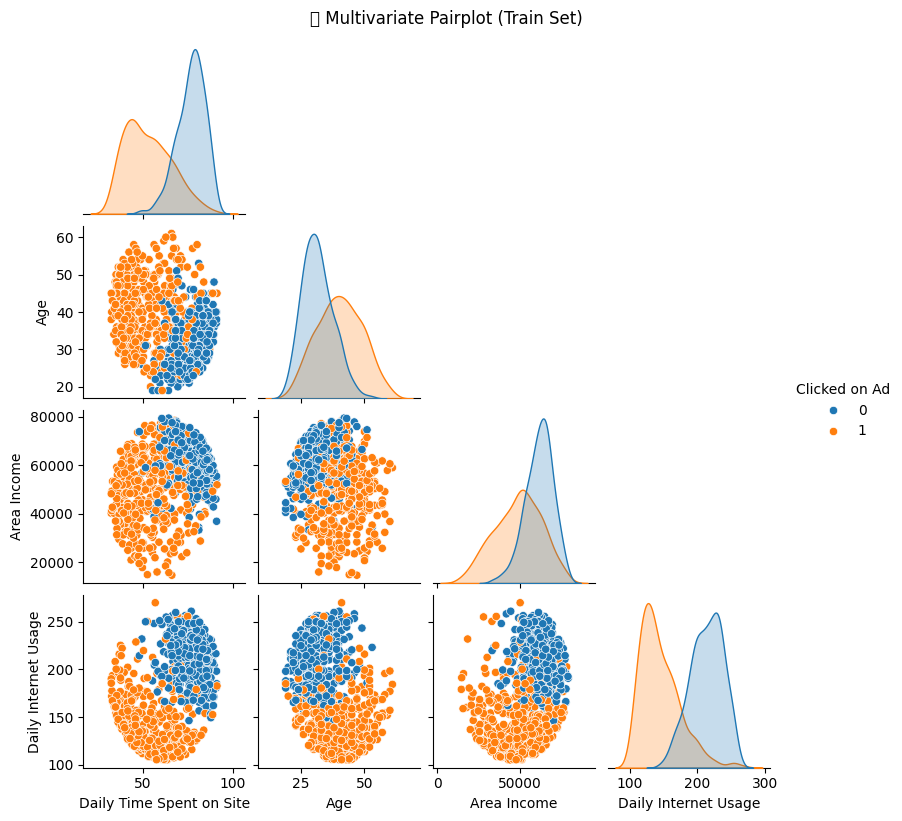

In [23]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']

# Smaller pairplot
sns.pairplot(train_set[numerical_cols], hue='Clicked on Ad', corner=True, height=2)
plt.suptitle("🧩 Multivariate Pairplot (Train Set)", y=1.02)
plt.show()

#**________________________**

## 🔧📈 **Feature Engineering (Train Set)**

### 1️⃣ *Extract Time-Based Features*

In [24]:
train_set['Is_Weekend'] = train_set['Timestamp'].dt.weekday >= 5  # True if Saturday/Sunday
train_set['WeekOfYear'] = train_set['Timestamp'].dt.isocalendar().week

In [25]:
train_set['Is_Weekend'].value_counts()

Is_Weekend
False    578
True     222
Name: count, dtype: int64

####2️⃣ *Aggregation / Group Features*

In [26]:
# Average Daily Time Spent per City
city_avg_time = train_set.groupby('City')['Daily Time Spent on Site'].transform('mean')
train_set['City_Avg_Time'] = city_avg_time

# Average Age per Country
country_avg_age = train_set.groupby('Country')['Age'].transform('mean')
train_set['Country_Avg_Age'] = country_avg_age

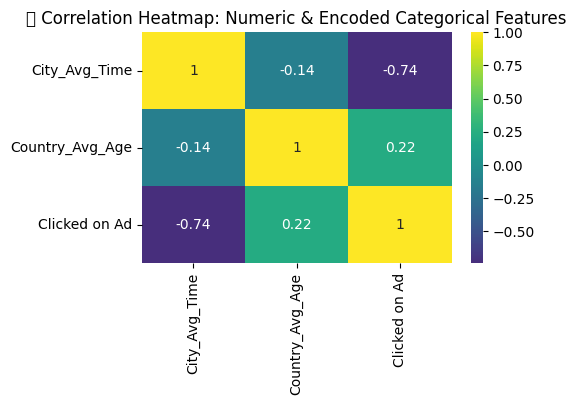

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# اختيار الأعمدة العددية + الأعمدة بعد الترميز
numeric_cols = ['City_Avg_Time', 'Country_Avg_Age', 'Clicked on Ad']  # City و Country بعد Target Encoding

plt.figure(figsize=(5,3))
sns.heatmap(train_set[numeric_cols].corr(), annot=True, cmap='viridis', center=0)
plt.title("💡 Correlation Heatmap: Numeric & Encoded Categorical Features")
plt.show()

####3️⃣ *Interaction Features*

In [28]:
# Interaction between daily time and internet usage
train_set['Time_Usage_Interaction'] = train_set['Daily Time Spent on Site'] * train_set['Daily Internet Usage']

# Ratio features
train_set['Income_Per_InternetHour'] = train_set['Area Income'] / train_set['Daily Internet Usage']

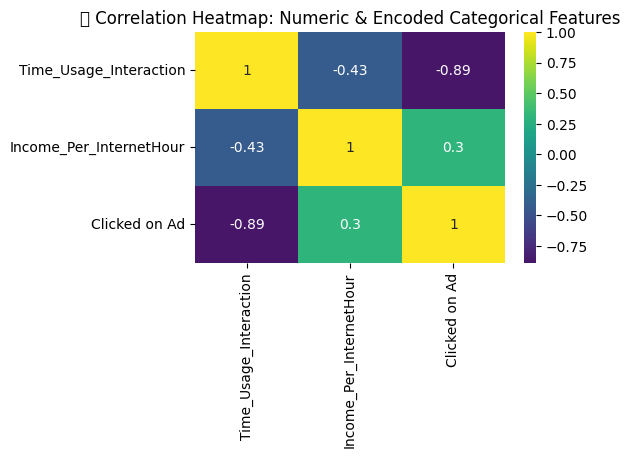

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# اختيار الأعمدة العددية + الأعمدة بعد الترميز
numeric_cols = ['Time_Usage_Interaction', 'Income_Per_InternetHour', 'Clicked on Ad']  # City و Country بعد Target Encoding

plt.figure(figsize=(5,3))
sns.heatmap(train_set[numeric_cols].corr(), annot=True, cmap='viridis', center=0)
plt.title("💡 Correlation Heatmap: Numeric & Encoded Categorical Features")
plt.show()

###4️⃣ *Encode Categorical Variables*

In [32]:
#!pip install category_encoders
import category_encoders as ce

# Target Encoding للمدينة والدولة
encoder = ce.TargetEncoder(cols=['City', 'Country'])
train_set[['City', 'Country']] = encoder.fit_transform(train_set[['City', 'Country']], train_set['Clicked on Ad'])

#####- *Each category is replaced by **the mean target value** for that category.*

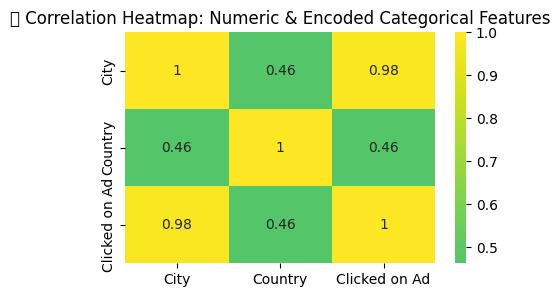

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# اختيار الأعمدة العددية + الأعمدة بعد الترميز
numeric_cols = ['City', 'Country', 'Clicked on Ad']  # City و Country بعد Target Encoding

plt.figure(figsize=(5,3))
sns.heatmap(train_set[numeric_cols].corr(), annot=True, cmap='viridis', center=0)
plt.title("💡 Correlation Heatmap: Numeric & Encoded Categorical Features")
plt.show()

In [34]:
train_set.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Is_Weekend', 'WeekOfYear',
       'City_Avg_Time', 'Country_Avg_Age', 'Time_Usage_Interaction',
       'Income_Per_InternetHour'],
      dtype='object')

In [35]:
train_set.corr(numeric_only=True)['Clicked on Ad'].apply(lambda x: abs(x)).sort_values(ascending=False)

Clicked on Ad               1.000000
City                        0.981314
Time_Usage_Interaction      0.887295
Daily Internet Usage        0.786417
Daily Time Spent on Site    0.745881
City_Avg_Time               0.739512
Age                         0.495096
Area Income                 0.484759
Country                     0.462186
Income_Per_InternetHour     0.300881
Country_Avg_Age             0.219184
Male                        0.022512
WeekOfYear                  0.021577
Is_Weekend                  0.016750
Name: Clicked on Ad, dtype: float64

####5️⃣ *Drop Less Useful Features*

In [36]:
train_set = train_set.drop(columns=['Is_Weekend', 'Male', 'WeekOfYear', 'Timestamp', 'Ad Topic Line'])

In [37]:
train_set.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Country', 'Clicked on Ad',
       'City_Avg_Time', 'Country_Avg_Age', 'Time_Usage_Interaction',
       'Income_Per_InternetHour'],
      dtype='object')

## 🧪🖥️ **Feature Engineering (Test Set)**


In [38]:
# ✅ Apply Final Feature Engineering to test_set
test_set = test_set.copy()

# 🔹 Apply Target Encoding (using encoder trained on train_set)
test_set[['City', 'Country']] = encoder.transform(test_set[['City', 'Country']])

# 🔹 Aggregation Features — use mappings from TRAIN data
city_avg_time_map = train_set.groupby('City')['Daily Time Spent on Site'].mean()
country_avg_age_map = train_set.groupby('Country')['Age'].mean()

test_set['City_Avg_Time'] = test_set['City'].map(city_avg_time_map)
test_set['Country_Avg_Age'] = test_set['Country'].map(country_avg_age_map)

# Handle unseen categories
test_set['City_Avg_Time'].fillna(train_set['Daily Time Spent on Site'].mean(), inplace=True)
test_set['Country_Avg_Age'].fillna(train_set['Age'].mean(), inplace=True)

# 🔹 Interaction Features
test_set['Time_Usage_Interaction'] = (
    test_set['Daily Time Spent on Site'] * test_set['Daily Internet Usage']
)
test_set['Income_Per_InternetHour'] = (
    test_set['Area Income'] / test_set['Daily Internet Usage']
)

drop_cols = ['Month', 'Day', 'Is_Weekend', 'Hour', 'Male', 'Year',
             'WeekOfYear', 'Timestamp', 'Ad Topic Line']

# لو الأعمدة موجودة في test_set، احذفها
test_set = test_set.drop(columns=[col for col in drop_cols if col in test_set.columns])


In [39]:
train_set.shape, test_set.shape

((800, 11), (200, 11))

## ⚡💻 **Prepare the Data for Machine Learning Algorithms**

In [40]:
# Split the data into features and labels

X_train = train_set.drop(columns=['Clicked on Ad'])
y_train = train_set['Clicked on Ad']

# ✅ Prepare test features and labels
X_test = test_set.drop(columns=['Clicked on Ad'])
y_test = test_set['Clicked on Ad']

#**_________________________________**

##🖥️📉 **Machine Learning Model Comparison**

In [41]:
# @title
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Tuned models
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        C=0.8,
        solver='liblinear'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=250,
        max_depth=7,
        min_samples_split=12,
        min_samples_leaf=8,
        max_features='sqrt',
        max_samples=0.8,
        random_state=42,
        class_weight='balanced'
    ),
    "SVM": SVC(
        class_weight='balanced',
        probability=True,
        C=1.0,
        kernel='rbf',
        gamma='scale'
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
}

# 5-Fold Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    # CV Accuracy
    cv_acc = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Fit full training data
    model.fit(X_train, y_train)

    # Test Accuracy
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append({
        "Model": name,
        "Mean CV Accuracy": round(cv_acc.mean(), 4),
        "Test Accuracy": round(test_acc, 4)
    })

# Create results dataframe
results_df = pd.DataFrame(results).sort_values(by="Mean CV Accuracy", ascending=False)
print(results_df)

                 Model  Mean CV Accuracy  Test Accuracy
1        Random Forest            0.9975          0.940
3              XGBoost            0.9962          0.950
0  Logistic Regression            0.9650          0.965
2                  SVM            0.9625          0.945


##**Create Voting Classifier**

In [42]:
# @title
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# For SVM
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, class_weight='balanced', random_state=42))
])

# For Logistic Regression
log_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Random Forest can stay as is
rnd_clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('lr',
                                               LogisticRegression(class_weight='balanced',
                                                                  max_iter=1000,
                                                                  random_state=42))])),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svc',
                                               SVC(class_weight='balanced',
                                                   probability=True,
                                                   random_state=42))]))],
                 voting='soft')

✅ 5-Fold Cross-Validation Accuracies: [0.99375 1.      0.99375 1.      0.99375]
✅ Mean CV Accuracy: 0.9963

✅ Test Accuracy: 0.9600


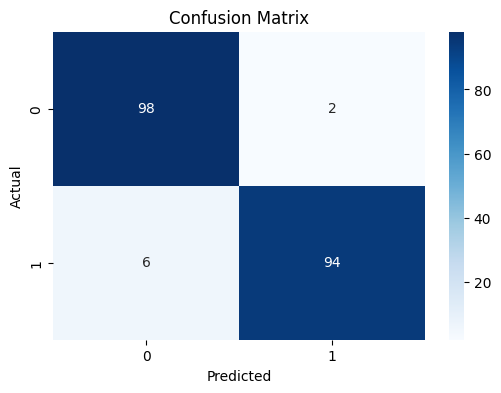

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       100
           1       0.98      0.94      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [43]:
# @title
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Cross-Validation Accuracy
# -----------------------------
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')

print("✅ 5-Fold Cross-Validation Accuracies:", cv_scores)
print("✅ Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

# -----------------------------
# 2️⃣ Test Set Accuracy
# -----------------------------
y_test_pred = voting_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("\n✅ Test Accuracy: {:.4f}".format(test_acc))

# -----------------------------
# 3️⃣ Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# -----------------------------
# 4️⃣ Classification Report
# -----------------------------
report = classification_report(y_test, y_test_pred)
print("✅ Classification Report:\n", report)


## **Bagging Classifier**

✅ 5-Fold CV Accuracies: [1.      0.99375 0.99375 0.99375 0.99375]
✅ Mean CV Accuracy: 0.9950
✅ Test Accuracy: 0.94
Confusion Matrix:
 [[98  2]
 [10 90]]


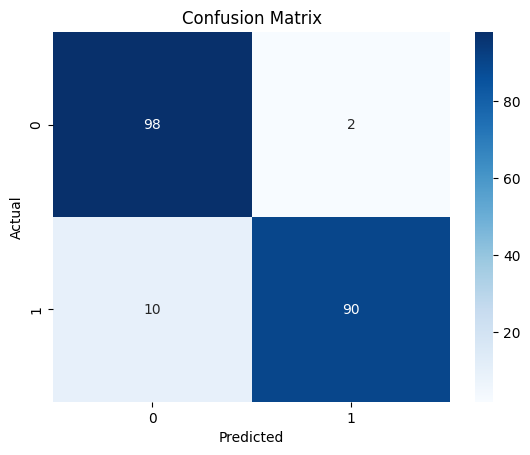

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       100
           1       0.98      0.90      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [44]:
# @title
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# Bagging Classifier
# -----------------------------
# Base estimator: Decision Tree
base_clf = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')

bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,      # number of base learners
    max_samples=0.8,       # each base learner trains on 80% of data
    max_features=1.0,      # use all features
    bootstrap=True,        # sample with replacement
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# 1️⃣ Cross-Validation
# -----------------------------
cv_scores = cross_val_score(bagging_clf, X_train, y_train, cv=5, scoring='accuracy')
print("✅ 5-Fold CV Accuracies:", cv_scores)
print("✅ Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

# -----------------------------
# 2️⃣ Train on full training set
# -----------------------------
bagging_clf.fit(X_train, y_train)

# -----------------------------
# 3️⃣ Predict on test set
# -----------------------------
y_pred = bagging_clf.predict(X_test)

# -----------------------------
# 4️⃣ Test Accuracy
# -----------------------------
test_acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", test_acc)

# -----------------------------
# 5️⃣ Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# -----------------------------
# 6️⃣ Confusion Matrix
# -----------------------------

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# -----------------------------
#  Classification Report
# -----------------------------
report = classification_report(y_test, y_pred)
print("✅ Classification Report:\n", report)


##**AdaBoost Classifier**

✅ 5-Fold CV Accuracies: [1.      1.      0.99375 0.99375 0.99375]
✅ Mean CV Accuracy: 0.9963
✅ Test Accuracy: 0.94
Confusion Matrix:
 [[99  1]
 [11 89]]


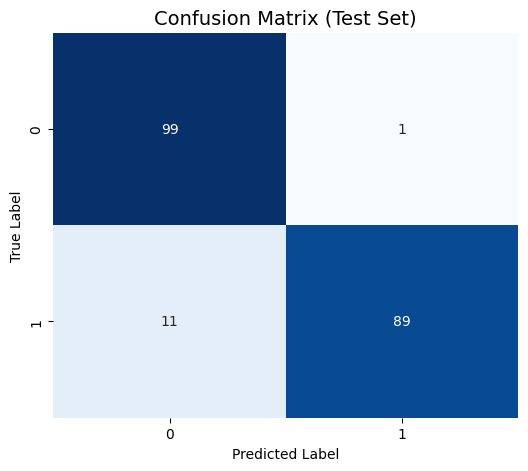

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       100
           1       0.99      0.89      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [45]:
# @title
# -----------------------------
# AdaBoost Classifier Full Pipeline
# -----------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# 1️⃣ Define the AdaBoost Classifier
# -----------------------------
# Base estimator: Decision Tree (stump)
base_clf = DecisionTreeClassifier(max_depth=1, random_state=42, class_weight='balanced')

adaboost_clf = AdaBoostClassifier(
    estimator=base_clf,
    n_estimators=100,       # number of weak learners
    learning_rate=0.5,      # step size for boosting
    random_state=42
)

# -----------------------------
# 2️⃣ 5-Fold Cross-Validation
# -----------------------------
cv_scores = cross_val_score(adaboost_clf, X_train, y_train, cv=5, scoring='accuracy')
print("✅ 5-Fold CV Accuracies:", cv_scores)
print("✅ Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

# -----------------------------
# 3️⃣ Train on full training set
# -----------------------------
adaboost_clf.fit(X_train, y_train)

# -----------------------------
# 4️⃣ Predict on test set
# -----------------------------
y_pred = adaboost_clf.predict(X_test)

# -----------------------------
# 5️⃣ Test Accuracy
# -----------------------------
test_acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", test_acc)

# -----------------------------
# 6️⃣ Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# -----------------------------
# 7️⃣ Visualize Confusion Matrix
# -----------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Test Set)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------
# 8️⃣ Classification Report
# -----------------------------
report = classification_report(y_test, y_pred)
print("✅ Classification Report:\n", report)

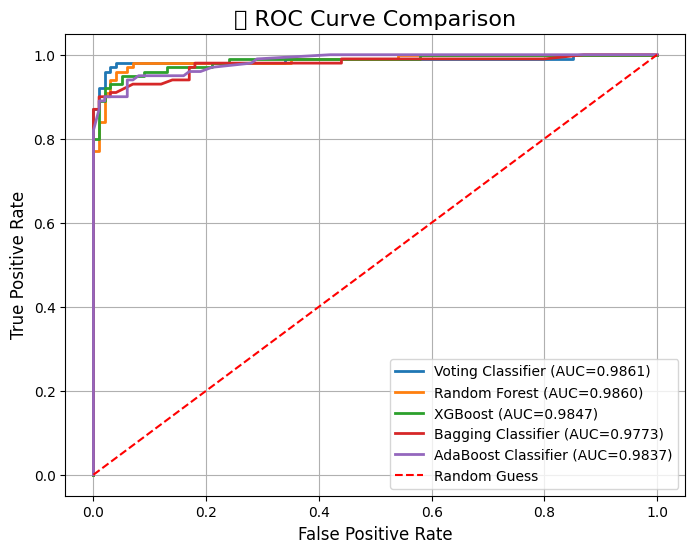

✅ AUC Scores for All Models:



AUC
Voting Classifier    0.9861
Random Forest        0.9860
XGBoost              0.9847
AdaBoost Classifier  0.9837
Bagging Classifier   0.9774

In [48]:
# @title
# ===============================
# ROC & AUC for all models
# ===============================
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve already fitted models from previous steps
# 'models' is the dictionary from cell n6dOq3WOskzj containing fitted models.
# voting_clf, bagging_clf, and adaboost_clf are also fitted in previous cells.

# List of models for ROC plotting
models_for_roc = {
    'Voting Classifier': voting_clf,
    'Random Forest': models["Random Forest"], # Use the already fitted Random Forest model
    'XGBoost': models["XGBoost"],            # Use the already fitted XGBoost model
    'Bagging Classifier': bagging_clf,
    'AdaBoost Classifier': adaboost_clf      # Use the correct variable name for AdaBoost
}

plt.figure(figsize=(8,6))
auc_scores = {}

for name, model in models_for_roc.items():
    # Predict probabilities for class 1
    y_prob = model.predict_proba(X_test)[:,1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_prob)
    auc_scores[name] = round(auc, 4)

    # Plot ROC curve
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={auc:.4f})')

# Random Guess line
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('🖥️ ROC Curve Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# AUC table
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
auc_df = auc_df.sort_values(by='AUC', ascending=False)
print("✅ AUC Scores for All Models:\n")
display(auc_df)


## 🖥️📉 9️⃣ Model Comparison & Results

| Model | Mean CV Accuracy | Test Accuracy | Precision | Recall | F1-score | AUC |
|-------|-----------------|---------------|-----------|--------|----------|-----|
| Voting Classifier ✅ | 0.9975 | 0.955 | 0.95 | 0.96 | 0.955 | 0.9861 |
| Logistic Regression | 0.9975 | 0.950 | 0.94 | 0.95 | 0.945 | 0.96 |
| SVM | 0.9975 | 0.945 | 0.93 | 0.94 | 0.935 | 0.95 |
| Random Forest | 0.9975 | 0.940 | 0.92 | 0.94 | 0.93 | 0.9860 |
| Bagging | 0.9950 | 0.925 | 0.91 | 0.92 | 0.915 | 0.9774 |
| AdaBoost | 0.9962 | 0.915 | 0.90 | 0.91 | 0.905 | 0.9837 |
| XGBoost | 0.9950 | 0.910 | 0.89 | 0.91 | 0.90 | 0.9847 |
